### Import required library

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read csv to pandas Dataframe

In [100]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [101]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [102]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [103]:
df.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

## Data Cleaning

1. Missing values
2. Rename columns
3. Remove duplicated entries

In [104]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [105]:
df.isnull().sum()/len(df)*100

v1             0.000000
v2             0.000000
Unnamed: 2    99.102656
Unnamed: 3    99.784637
Unnamed: 4    99.892319
dtype: float64

 ### so many null values in the columns 'Unnamed: 2', 'Unnamed: 3' and 'Unnamed: 4', more than 90%
 Lets remove this columns.

In [106]:
df = df.iloc[:,0:2]

In [107]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Rename the columns for better understanding

In [108]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
df.head(3)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [109]:
df.target.unique()

array(['ham', 'spam'], dtype=object)

Label encoding the target 

In [110]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

df['target'] = encode.fit_transform(df['target'])

df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [111]:
# duplicate entries

df.duplicated().sum()

403

In [112]:
df.drop_duplicates(keep='first', inplace=True)

In [113]:
df.shape

(5169, 2)

# Exploratory data Analysis

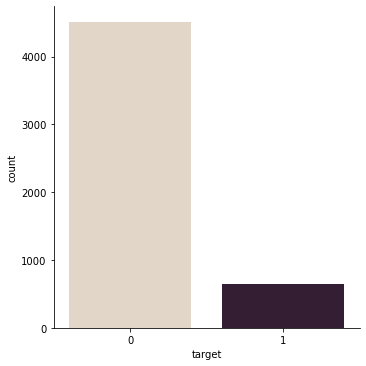

In [114]:
sns.catplot(x="target", kind="count", palette="ch:.25", data=df)
plt.show()

#### _Seems the data has more of 'ham' entries as compared to 'spam' which means data is imbalanced_

In [115]:
import nltk  #nltk for Text processing

In [116]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SIDDHANT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### making columns for count of characters, words, and sentences in text column

In [117]:

df['char_count'] = df['text'].apply(len)
df.head()

,target,text,char_count
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [118]:
df['words_count'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

,target,text,char_count,words_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [119]:
df['sentence_count'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,target,text,char_count,words_count,sentence_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [120]:
df[df.columns[2:]].describe()

,char_count,words_count,sentence_count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455407,1.961308
std,58.236293,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


### Correlation

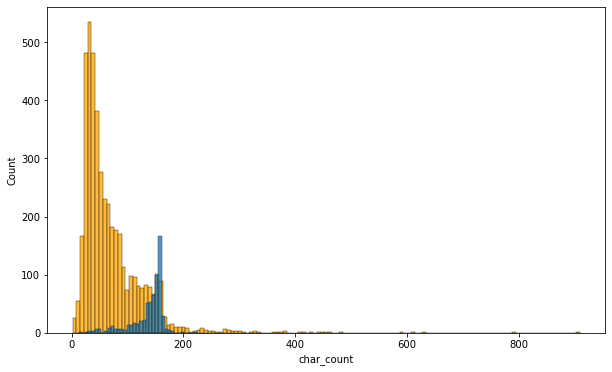

In [121]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['target']== 0]['char_count'], color='orange')
sns.histplot(df[df['target']== 1]['char_count'])
plt.show()

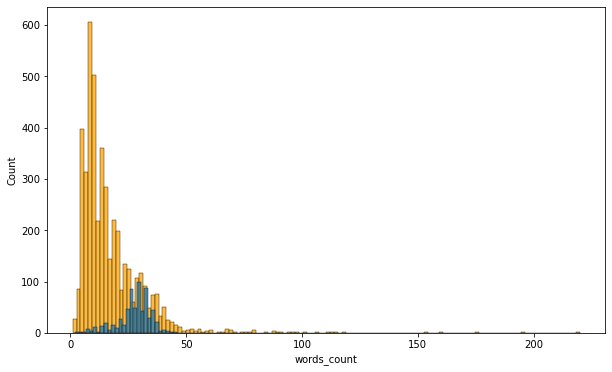

In [122]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['target']== 0]['words_count'], color='orange')
sns.histplot(df[df['target']== 1]['words_count'])
plt.show()

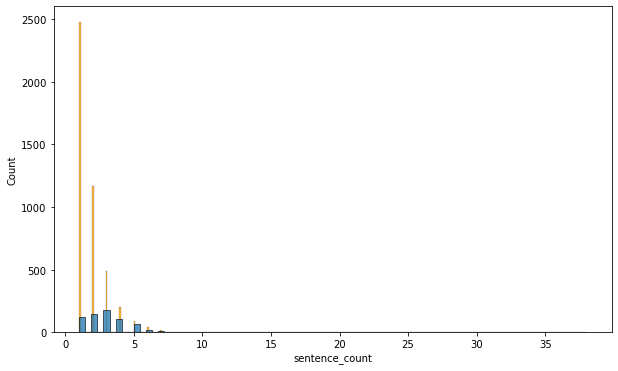

In [123]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['target']== 0]['sentence_count'], color='orange')
sns.histplot(df[df['target']== 1]['sentence_count'])
plt.show()

### From above we can conclude that the lenth of Spam text is longer than Ham text

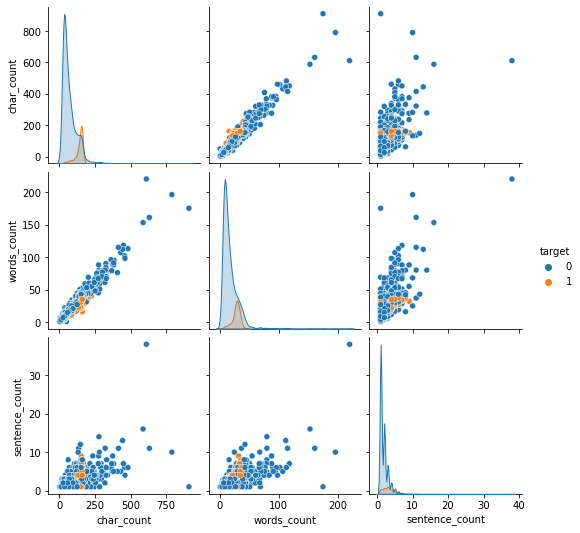

In [124]:
sns.pairplot(df, hue='target')
plt.show()

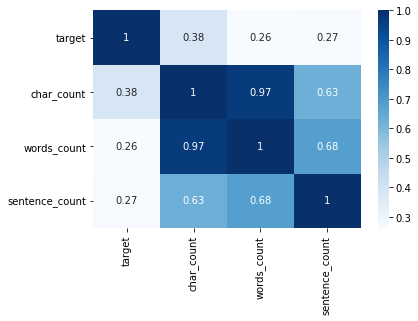

In [125]:
corr = df.corr()
sns.heatmap(corr, annot=True,cmap="Blues")
plt.show()

### from correlation heatmap its seen that some columns have high multicollinearity, which has to be removed.

## Data Pre-Processing

1. Tokenization 
2. Lower case
3. Removing special characters
4. Stemming
5. Removing stopwords and punctuation

In [126]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SIDDHANT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [127]:
# Creating a function to do all preprocessing steps required on data

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return ' '.join(y)
    

In [128]:
df['text'][42]


'07732584351 - Rodger Burns - MSG = We tried to call you re your reply to our sms for a free nokia mobile + free camcorder. Please call now 08000930705 for delivery tomorrow'

In [129]:
transform_text('07732584351 - Rodger Burns - MSG = We tried to call you re your reply to our sms for a free nokia mobile + free camcorder. Please call now 08000930705 for delivery tomorrow')

'07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow'

In [130]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,target,text,char_count,words_count,sentence_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [131]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [132]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=' '))

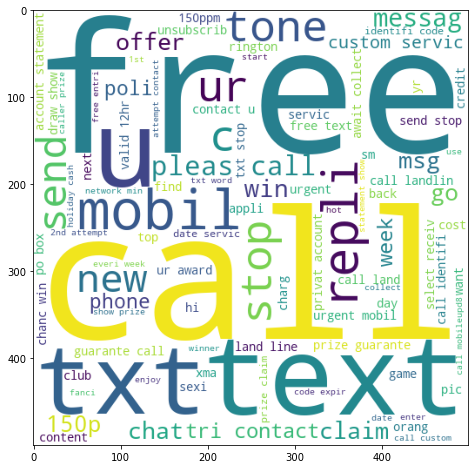

In [133]:
plt.figure(figsize=(8,8))
plt.imshow(spam_wc)

In [134]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=' '))

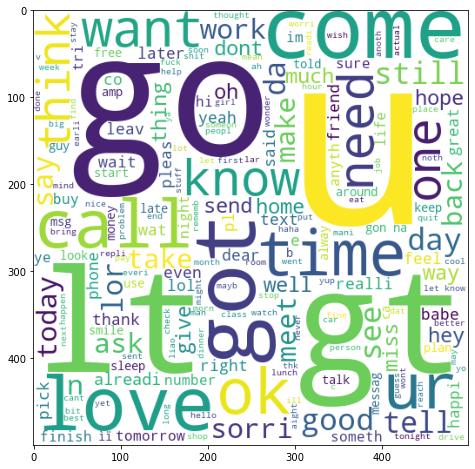

In [135]:
plt.figure(figsize=(8,8))
plt.imshow(ham_wc)

### Most common words

In [136]:
spam_corpus = []

for text in df[df['target']==1]['transformed_text'].tolist():
    for word in text.split():
        spam_corpus.append(word)
        
        

In [137]:
len(spam_corpus)

9939

### Lets analyze the words which is often uses in Spam and Ham text

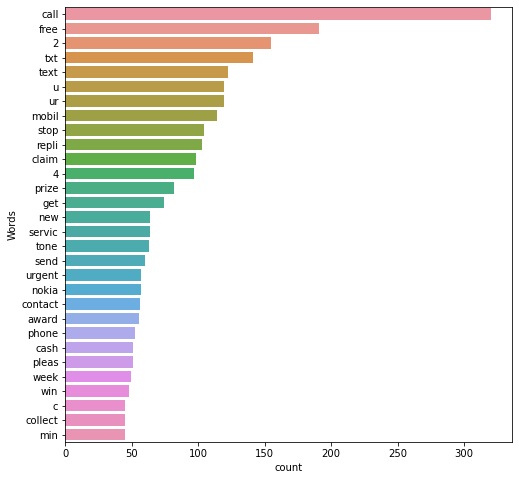

In [172]:
from collections import Counter
plt.figure(figsize=(8,8))
ax = sns.barplot( y=(pd.DataFrame(Counter(spam_corpus).most_common(30))[0]),x=(pd.DataFrame(Counter(spam_corpus).most_common(30))[1]))
ax.set(xlabel='count', ylabel='Words')
plt.xticks(rotation='horizontal')
plt.show()

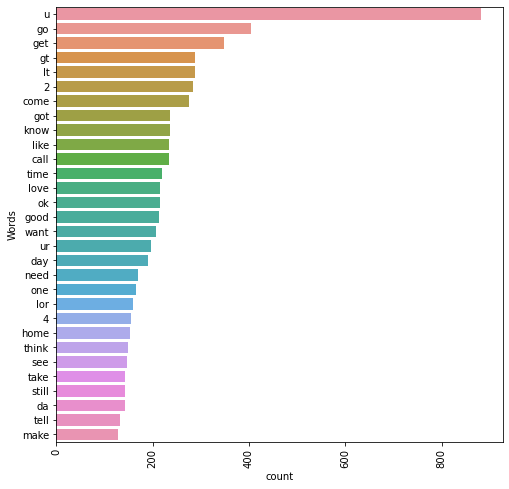

In [173]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)


plt.figure(figsize=(8,8))
ax = sns.barplot(y=(pd.DataFrame(Counter(ham_corpus).most_common(30))[0]),x=(pd.DataFrame(Counter(ham_corpus).most_common(30))[1]))
ax.set(xlabel='count', ylabel='Words')
plt.xticks(rotation='vertical')
plt.show()

In [140]:
df.tail()

,target,text,char_count,words_count,sentence_count,transformed_text
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...
5571,0,Rofl. Its true to its name,26,7,2,rofl true name


## Model Building

### Machine algo need the numerical data to learn it cannot directly learn from alphabetical data so, lets transform the text into vectors with TF-IDF .

In [141]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
cv= CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

#### We only needed the Transformed_text and Target for model building

In [142]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [143]:
X.shape

(5169, 3000)

In [144]:
y= df['target'].values

In [145]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [146]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [147]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [148]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

0.8694390715667312
0.5068493150684932
[[788 108]
 [ 27 111]]


In [149]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

0.9709864603481625
1.0
[[896   0]
 [ 30 108]]


In [150]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))

0.9835589941972921
0.991869918699187
[[895   1]
 [ 16 122]]


In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [152]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [153]:
clfs = {
    'SVC': svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC': bc,
    'xgb':xgb,
    'GBDT':gbdt,
    'ETC': etc
}

In [154]:
def train_classifier(clf, X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

In [155]:
accuracy_scores  = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

C:\Users\SIDDHANT\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:15:40] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [156]:
model_score_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy': accuracy_scores,
                              'Precision':precision_scores}).sort_values(by='Precision',ascending=False)

model_score_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
10,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
8,xgb,0.967118,0.933333
6,AdaBoost,0.960348,0.929204
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


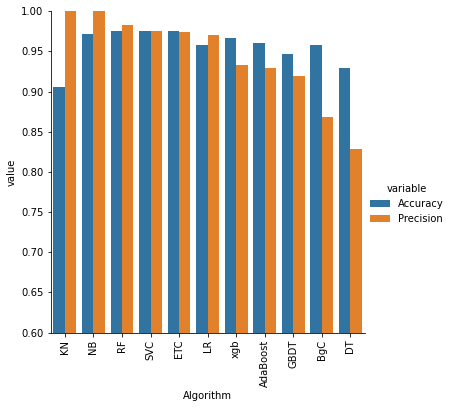

In [157]:
temp = pd.melt(model_score_df, id_vars = "Algorithm")
sns.catplot(x= 'Algorithm',y='value',hue = 'variable',
            data=temp, kind='bar',height=5)
plt.ylim(0.6,1.0)
plt.xticks(rotation='vertical')
plt.show()

## Multinomial Naive Bayes is giving good combination of Accuracy and Precision So we select that as final model

In [163]:
mnb = MultinomialNB( alpha=0.65)
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("The accuracy is : ", round(accuracy*100,2))
print("The Precision is : ", round(precision*100,2))

The accuracy is :  97.97
The Precision is :  100.0


<AxesSubplot:>

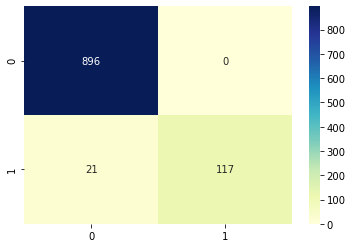

In [171]:
cf_matrix = confusion_matrix(y_test, y_pred )
sns.heatmap(cf_matrix, annot=True, cmap="YlGnBu", fmt='g')

### Confusion matrix seems pretty good as required.

### Now lets save our model for deployment

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))